In [6]:
import warnings

warnings.filterwarnings('ignore')

# 2 基于geopandas的空间计算

In [7]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import pandas as pd

gpd.__version__

'0.10.2'

## 2.1 空间连接

- **参数op**

In [8]:
# 读入柏林行政区划面文件
Berlin = gpd.read_file('Berlin/Bezirke__Berlin.shp')
Berlin.head() # Gemeinde_n代表镇，即Berlin中每个面文件对应的行政区划名称

,OBJECTID,gml_id,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,Shape__Are,Shape__Len,geometry
0,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.32074 52.62660, 13.32104 52.62658..."
1,2,s_wfs_alkis_bezirk.F176__2,Charlottenburg-Wilmersdorf,004,Berlin,11,11000004,1.742738e+08,71785.131858,"POLYGON ((13.32111 52.52446, 13.32137 52.52452..."
2,3,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,4.503972e+08,149810.619914,"POLYGON ((13.57925 52.39083, 13.57894 52.39078..."
3,4,s_wfs_alkis_bezirk.F176__4,Pankow,003,Berlin,11,11000003,2.792661e+08,109210.896203,"MULTIPOLYGON (((13.50481 52.61960, 13.50484 52..."
4,5,s_wfs_alkis_bezirk.F176__5,Neukölln,008,Berlin,11,11000008,1.207122e+08,66590.293473,"POLYGON ((13.45832 52.48569, 13.45856 52.48552..."


In [9]:
Berlin_transport = gpd.read_file('Berlin/gis_osm_transport_free_1.shp')
Berlin_transport.head()

,osm_id,code,fclass,name,geometry
0,21302157,5601,railway_station,S Tiergarten,POINT (13.33645 52.51437)
1,21385751,5602,railway_halt,S Storkower Straße,POINT (13.46489 52.52374)
2,21487225,5602,railway_halt,S Jannowitzbrücke,POINT (13.41949 52.51421)
3,26124376,5601,railway_station,S Westend,POINT (13.28442 52.51801)
4,26603219,5601,railway_station,S Wannsee,POINT (13.17981 52.42141)


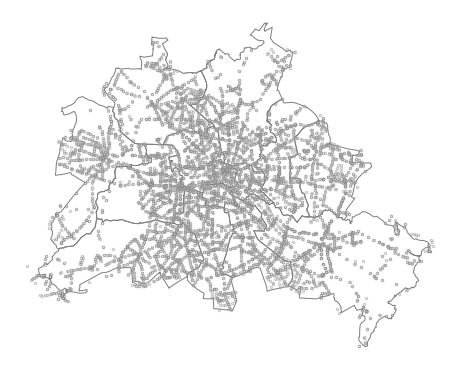

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

# 投影选择web mercator 
ax.axis('off')
# 区划图层
ax = Berlin.to_crs('EPSG:3857') \
           .plot(ax=ax,
                 facecolor='none',
                 edgecolor='grey')
# 站点图层
ax = Berlin_transport.to_crs('EPSG:3857') \
                     .plot(ax=ax,
                           facecolor='lightgrey',
                           alpha=0.4,
                           edgecolor='grey',
                           markersize=6)

fig.savefig('图5.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [11]:
gpd.sjoin(left_df=Berlin,
          right_df=Berlin_transport.query("fclass=='bus_stop'"),
          op='intersects') \
   .groupby('Gemeinde_n') \
   .size()

Gemeinde_n
Charlottenburg-Wilmersdorf    549
Friedrichshain-Kreuzberg      288
Lichtenberg                   286
Marzahn-Hellersdorf           429
Mitte                         494
Neukölln                      488
Pankow                        506
Reinickendorf                 623
Spandau                       570
Steglitz-Zehlendorf           726
Tempelhof-Schöneberg          564
Treptow-Köpenick              587
dtype: int64

In [12]:
gpd.sjoin(left_df=Berlin,
          right_df=Berlin_transport.query("fclass=='bus_stop'"),
          op='contains') \
   .groupby('Gemeinde_n') \
   .size()

Gemeinde_n
Charlottenburg-Wilmersdorf    549
Friedrichshain-Kreuzberg      288
Lichtenberg                   286
Marzahn-Hellersdorf           429
Mitte                         494
Neukölln                      488
Pankow                        506
Reinickendorf                 623
Spandau                       570
Steglitz-Zehlendorf           726
Tempelhof-Schöneberg          564
Treptow-Köpenick              587
dtype: int64

In [13]:
gpd.sjoin(left_df=Berlin,
          right_df=Berlin_transport.query("fclass=='bus_stop'"),
          op='within') \
   .groupby('Gemeinde_n') \
   .size()

Series([], dtype: int64)

In [14]:
gpd.sjoin(left_df=Berlin_transport.query("fclass=='bus_stop'"),
          right_df=Berlin,
          op='within') \
   .groupby('Gemeinde_n') \
   .size()

Gemeinde_n
Charlottenburg-Wilmersdorf    549
Friedrichshain-Kreuzberg      288
Lichtenberg                   286
Marzahn-Hellersdorf           429
Mitte                         494
Neukölln                      488
Pankow                        506
Reinickendorf                 623
Spandau                       570
Steglitz-Zehlendorf           726
Tempelhof-Schöneberg          564
Treptow-Köpenick              587
dtype: int64

In [15]:
gpd.sjoin(left_df=Berlin_transport.query("fclass=='bus_stop'"),
          right_df=Berlin,
          how='right')

,index_left,osm_id,code,fclass,name,OBJECTID,gml_id,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,Shape__Are,Shape__Len,geometry
0,175,79593591,5621,bus_stop,Otisstraße/Quäkerstraße,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.32074 52.62660, 13.32104 52.62658..."
0,176,79594504,5621,bus_stop,Otisstraße/Wittestraße,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.32074 52.62660, 13.32104 52.62658..."
0,177,79595616,5621,bus_stop,Auguste-Viktoria-Allee/Quäkerstraße,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.32074 52.62660, 13.32104 52.62658..."
0,178,79597771,5621,bus_stop,Uranusweg,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.32074 52.62660, 13.32104 52.62658..."
0,179,79599789,5621,bus_stop,Eichborndamm/Antonienstraße,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.32074 52.62660, 13.32104 52.62658..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,7745,5788149790,5621,bus_stop,U Eisenacher Straße,12,s_wfs_alkis_bezirk.F176__12,Tempelhof-Schöneberg,007,Berlin,11,11000007,1.425228e+08,75867.096356,"POLYGON ((13.38759 52.38677, 13.38755 52.38701..."
11,7750,5840156181,5621,bus_stop,Stadtrandsiedlung,12,s_wfs_alkis_bezirk.F176__12,Tempelhof-Schöneberg,007,Berlin,11,11000007,1.425228e+08,75867.096356,"POLYGON ((13.38759 52.38677, 13.38755 52.38701..."
11,7816,6238926222,5621,bus_stop,U Alt-Mariendorf,12,s_wfs_alkis_bezirk.F176__12,Tempelhof-Schöneberg,007,Berlin,11,11000007,1.425228e+08,75867.096356,"POLYGON ((13.38759 52.38677, 13.38755 52.38701..."
11,7864,6352560927,5621,bus_stop,Mariendorfer Damm/Buckower Chaussee,12,s_wfs_alkis_bezirk.F176__12,Tempelhof-Schöneberg,007,Berlin,11,11000007,1.425228e+08,75867.096356,"POLYGON ((13.38759 52.38677, 13.38755 52.38701..."


## 2.2 拓扑关系判断

- **长度n与长度1进行比较**

In [16]:
geo1 = gpd.GeoSeries([Polygon([(-1, -1), (1, -1), (1, 1), (-1, 1)]),
                      Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])])
geo2 = gpd.GeoSeries([Point(0, 0)])

geo1.contains(geo2)

0     True
1    False
dtype: bool

- **长度1与长度n进行比较**

In [17]:
geo1 = gpd.GeoSeries([Polygon([(-1, -1), (1, -1), (1, 1), (-1, 1)])])
geo2 = gpd.GeoSeries([Point(0, 0), Point(2, 2)])

geo1.contains(geo2)

0     True
1    False
dtype: bool

- **长度m与长度m-n（n>0）进行比较**

In [18]:
geo1 = gpd.GeoSeries([Polygon([(-1, -1), (1, -1), (1, 1), (-1, 1)]),
                      Polygon([(1.5, 1.5), (2.5, 1.5), (2.5, 2.5), (1.5, 2.5)]),
                      Polygon([(3, 3), (4, 3), (4, 4), (3, 4)])])
geo2 = gpd.GeoSeries([Point(0, 0), Point(2, 2)])

geo1.contains(geo2)

0     True
1     True
2    False
dtype: bool

- **长度m-n（n>0）与长度n进行比较**

In [19]:
geo1 = gpd.GeoSeries([Polygon([(-1, -1), (1, -1), (1, 1), (-1, 1)]),
                      Polygon([(1.5, 1.5), (2.5, 1.5), (2.5, 2.5), (1.5, 2.5)])])
geo2 = gpd.GeoSeries([Point(0, 0), Point(2, 2), Point(2, 2), Point(2, 2)])

geo1.contains(geo2)

0     True
1     True
2    False
3    False
dtype: bool

## 2.3 空间裁切

<AxesSubplot:>

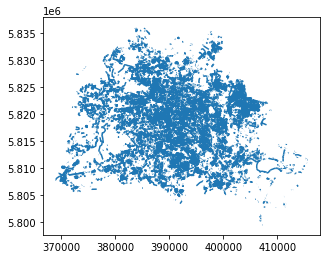

In [20]:
Berlin_footway = gpd.read_file('Berlin/berlin_footway_WGS84.shp')
Berlin_footway.to_crs('EPSG:32633', inplace=True) # 转换为合适的投影坐标系
Berlin_footway.plot()

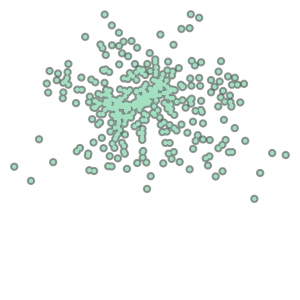

In [21]:
# 整合所有出租车站点500米缓冲区
taxi_station_500_buffer = Berlin_transport.query("fclass=='taxi'") \
                                          .to_crs('EPSG:32633') \
                                          .buffer(distance=500) \
                                          .unary_union
taxi_station_500_buffer

In [22]:
# 裁切所有出租车站点500米缓冲区内部的路网线数据
taxi_station_500buffer_roads = gpd.clip(gdf=Berlin_footway,
                                        mask=taxi_station_500_buffer)

(367253.8868327536, 415735.5052230159, 5801631.184128096, 5834942.43874798)

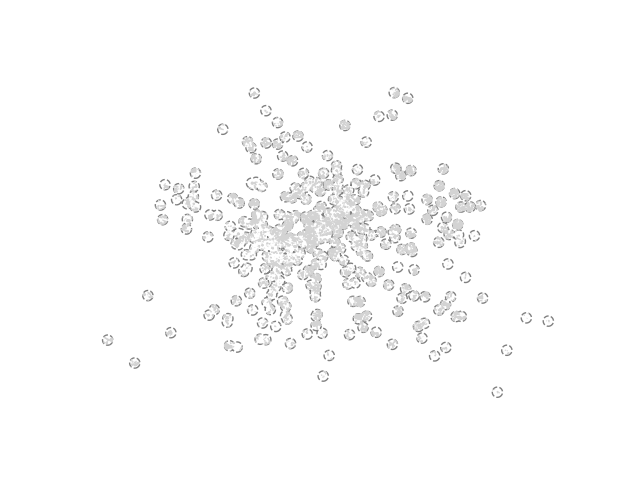

In [25]:
# 交互式绘图模式
%matplotlib widget 

ax = taxi_station_500buffer_roads.plot(edgecolor='lightgrey',
                                       linewidth=1)
gpd.GeoSeries([taxi_station_500_buffer]).plot(ax=ax, 
                                              facecolor='none',
                                              edgecolor='grey',
                                              linestyle='--')

ax.axis('off')

- **与叠加分析进行对比**

In [ ]:
# 求得整个柏林被出租车站点500米缓冲区所覆盖的步道路网总长度
taxi_station_500buffer_roads.length.sum()

1726014.5434753783

In [ ]:
# 整合所有出租车站点500米缓冲区GeoSeries
taxi_station_500_buffer_ = Berlin_transport.query("fclass=='taxi'") \
                                           .to_crs('EPSG:32633')

taxi_station_500_buffer_['geometry'] = taxi_station_500_buffer_.buffer(500)

# 对柏林步道与出租车缓冲区进行叠加分析
taxi_station_500buffer_roads_ = gpd.overlay(Berlin_footway,
                                           taxi_station_500_buffer_)

# 求出每个站点周边500米半径内步道路网长度
taxi_station_500buffer_roads_.groupby('osm_id_2') \
                             .agg({'geometry': lambda s: s.length.sum()})

,geometry
osm_id_2,
1005312207,3224.920537
1026187828,3984.527391
1027937528,7016.201300
1035334157,1630.386299
1037241969,2309.198289
...,...
945288187,7230.467265
946513276,2057.920151
960550612,4604.571097


In [ ]:
# 叠加分析路网结果表矢量总长度
taxi_station_500buffer_roads_.groupby('osm_id_2') \
                             .agg({'geometry': lambda s: s.length.sum()}) \
                             .geometry.sum()

2636775.565970871

In [ ]:
# 裁切分析路网结果表矢量总长度
taxi_station_500buffer_roads.length.sum()

1726014.5434753783